# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [19]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Import API key
from api_keys import weather_api_key



# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

In [9]:
pip install citipy

  Created wheel for citipy: filename=citipy-0.0.5-py3-none-any.whl size=559704 sha256=7b1fb434e198cff4d2a6c423577c3f4b72a81687287df5c61ae564cf74ca1904
  Stored in directory: c:\users\kaoti\appdata\local\pip\cache\wheels\6d\df\5e\ad8eb9cc5ee7f4ba76865167c09f9a7edff405c669111d8353
Successfully built citipy



## Generate Cities List

In [11]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

605

In [12]:
cities

['ixtapa',
 'jamestown',
 'bafq',
 'kijang',
 'ostrovnoy',
 'hualmay',
 'vaini',
 'hasaki',
 'isabela',
 'lerwick',
 'greencastle',
 'umzimvubu',
 'rikitea',
 'atambua',
 'zanjan',
 'hermanus',
 'chara',
 'atuona',
 'ust-karsk',
 'pevek',
 'bethel',
 'hamilton',
 'bambous virieux',
 'san carlos de bariloche',
 'provideniya',
 'santa maria',
 'cape town',
 'georgetown',
 'upernavik',
 'highland',
 'busselton',
 'port alfred',
 'merrill',
 'lagoa',
 'mataura',
 'benito juarez',
 'iqaluit',
 'marquette',
 'vaitupu',
 'ushuaia',
 'chalmette',
 'bluff',
 'shar',
 'nikolskoye',
 'san quintin',
 'belushya guba',
 'sao joao da barra',
 'san joaquin',
 'tiksi',
 'bathsheba',
 'new norfolk',
 'fort wellington',
 'moranbah',
 'punta arenas',
 'hithadhoo',
 'seoul',
 'batagay-alyta',
 'kayerkan',
 'caravelas',
 'manzhouli',
 'buraydah',
 'carnarvon',
 'esperance',
 'port hedland',
 'talnakh',
 'isangel',
 'kavieng',
 'linxia',
 'paysandu',
 'sitka',
 'khatanga',
 'port hardy',
 'ribeira grande',
 

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [21]:


# set query url
query_url = f"http://api.openweathermap.org/data/2.5/weather?appid={weather_api_key}&units=imperial&q="



# create lists for storage in dataframe
api_city = []
api_lng = []
api_lat = []
api_cloud = []
api_temp_max = []
api_humidity = []
api_wspeed = []
api_country = []
api_date = []

# set initial count quantities for organization
counter_1 = 0
counter_2 = 1

# for loop to create columns
for city in cities:
    try:
        response = requests.get(query_url + city.replace(" ","&")).json()
        api_lng.append(response['coord']['lon'])
        api_lat.append(response['coord']['lat'])
        api_cloud.append(response['clouds']['all'])
        api_temp_max.append(response['main']['temp_max'])
        api_humidity.append(response['main']['humidity'])
        api_wspeed.append(response['wind']['speed'])
        api_country.append(response['sys']['country'])
        api_date.append(response['dt'])
        
        if counter_1 > 48:
            counter_1 = 1
            counter_2 += 1
            api_city.append(city)
        else:
            counter_1 += 1
            api_city.append(city)
        print(f"Processing Record {counter_1} of Set {counter_2} | {city}")
    except Exception:
        print("City not found. Skipping...")
print("------------------------------\nData Retrieval Complete\n------------------------------")

Processing Record 1 of Set 1 | ixtapa
Processing Record 2 of Set 1 | jamestown
Processing Record 3 of Set 1 | bafq
Processing Record 4 of Set 1 | kijang
Processing Record 5 of Set 1 | ostrovnoy
Processing Record 6 of Set 1 | hualmay
Processing Record 7 of Set 1 | vaini
Processing Record 8 of Set 1 | hasaki
Processing Record 9 of Set 1 | isabela
Processing Record 10 of Set 1 | lerwick
Processing Record 11 of Set 1 | greencastle
City not found. Skipping...
Processing Record 12 of Set 1 | rikitea
Processing Record 13 of Set 1 | atambua
Processing Record 14 of Set 1 | zanjan
Processing Record 15 of Set 1 | hermanus
Processing Record 16 of Set 1 | chara
Processing Record 17 of Set 1 | atuona
Processing Record 18 of Set 1 | ust-karsk
Processing Record 19 of Set 1 | pevek
Processing Record 20 of Set 1 | bethel
Processing Record 21 of Set 1 | hamilton
Processing Record 22 of Set 1 | bambous virieux
Processing Record 23 of Set 1 | san carlos de bariloche
Processing Record 24 of Set 1 | providen

Processing Record 40 of Set 4 | grindavik
Processing Record 41 of Set 4 | tocopilla
Processing Record 42 of Set 4 | llanes
Processing Record 43 of Set 4 | severnyy
Processing Record 44 of Set 4 | aswan
Processing Record 45 of Set 4 | tasiilaq
Processing Record 46 of Set 4 | beidao
Processing Record 47 of Set 4 | doka
City not found. Skipping...
Processing Record 48 of Set 4 | otjimbingwe
Processing Record 49 of Set 4 | urambo
Processing Record 1 of Set 5 | lerum
City not found. Skipping...
Processing Record 2 of Set 5 | kapaa
City not found. Skipping...
Processing Record 3 of Set 5 | victoria
Processing Record 4 of Set 5 | kaitangata
Processing Record 5 of Set 5 | valdivia
Processing Record 6 of Set 5 | eirunepe
Processing Record 7 of Set 5 | saint-augustin
Processing Record 8 of Set 5 | tarko-sale
Processing Record 9 of Set 5 | malindi
Processing Record 10 of Set 5 | dolgoye
Processing Record 11 of Set 5 | salsk
Processing Record 12 of Set 5 | lazaro cardenas
Processing Record 13 of S

Processing Record 31 of Set 8 | clonakilty
Processing Record 32 of Set 8 | sayyan
Processing Record 33 of Set 8 | miri
Processing Record 34 of Set 8 | jishou
Processing Record 35 of Set 8 | smithers
Processing Record 36 of Set 8 | narsaq
Processing Record 37 of Set 8 | mathathane
Processing Record 38 of Set 8 | ihosy
Processing Record 39 of Set 8 | nanuque
Processing Record 40 of Set 8 | pouebo
Processing Record 41 of Set 8 | oktyabrskiy
Processing Record 42 of Set 8 | hami
Processing Record 43 of Set 8 | oistins
Processing Record 44 of Set 8 | westport
Processing Record 45 of Set 8 | kenai
Processing Record 46 of Set 8 | alofi
City not found. Skipping...
City not found. Skipping...
Processing Record 47 of Set 8 | coquimbo
Processing Record 48 of Set 8 | castricum
Processing Record 49 of Set 8 | fukue
Processing Record 1 of Set 9 | shostka
Processing Record 2 of Set 9 | ndago
Processing Record 3 of Set 9 | helong
Processing Record 4 of Set 9 | chirongui
Processing Record 5 of Set 9 | s

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [27]:
# create a dictionary to store into df
weather_dict = {
    "City":api_city,
    "Lat":api_lat,
    "Lng":api_lng,
    "Max Temp":api_temp_max,
    "Humidity":api_humidity,
    "Cloudiness":api_cloud,
    "Wind Speed":api_wspeed,
    "Country":api_country,
    "Date":api_date
}

weather_df = pd.DataFrame(weather_dict)

weather_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,ixtapa,20.7000,-105.2000,75.20,73,1,9.22,MX,1612564735
1,jamestown,42.0970,-79.2353,25.00,63,90,17.27,US,1612564611
2,bafq,31.6128,55.4107,59.56,29,4,8.72,IR,1612564854
3,kijang,35.2442,129.2139,30.20,74,0,1.14,KR,1612564854
4,ostrovnoy,68.0531,39.5131,12.88,92,100,10.49,RU,1612564855


In [28]:
#save in csv file
weather_df.to_csv(output_data_file)

In [29]:
weather_df.describe()

,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Date
count,546.000000,546.000000,546.000000,546.000000,546.000000,546.000000,5.460000e+02
mean,23.693205,18.630434,48.327784,73.769231,52.864469,7.702784,1.612565e+09
std,30.817030,87.076470,31.432007,19.555938,39.153239,5.622256,9.221533e+01
min,-54.800000,-175.200000,-42.770000,11.000000,0.000000,0.200000,1.612565e+09
25%,-2.649175,-52.631875,30.200000,64.000000,11.000000,3.440000,1.612565e+09
50%,30.055300,22.285750,57.000000,79.000000,60.000000,5.990000,1.612565e+09
75%,48.983400,93.312500,75.195000,88.000000,90.000000,10.360000,1.612565e+09
max,78.218600,178.416700,91.400000,100.000000,100.000000,32.210000,1.612565e+09


## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

In [6]:
#In the previous output, max humidity is 100

,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Date
count,550.000000,550.000000,550.000000,550.000000,550.000000,550.000000,5.500000e+02
mean,19.973545,17.124400,58.331400,67.890909,52.141818,8.544800,1.585764e+09
std,33.284840,91.595451,25.795297,20.864881,35.766469,6.078869,5.539674e+01
min,-54.800000,-179.170000,-11.340000,9.000000,0.000000,0.160000,1.585764e+09
25%,-8.077500,-64.627500,42.800000,55.000000,20.000000,4.525000,1.585764e+09
50%,23.630000,19.635000,64.940000,72.000000,57.000000,7.325000,1.585764e+09
75%,48.672500,97.350000,78.800000,83.000000,86.750000,11.410000,1.585764e+09
max,78.220000,179.320000,102.200000,100.000000,100.000000,46.080000,1.585764e+09


In [17]:
#  Get the indices of cities that have humidity over 100%.


Int64Index([], dtype='int64')

In [19]:
# Make a new DataFrame equal to the city data to drop all humidity outliers by index.
# Passing "inplace=False" will make a copy of the city_data DataFrame, which we call "clean_city_data".


,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,butaritari,3.07,172.79,83.32,74,84,10.42,KI,1593605283
1,yerbogachen,61.28,108.01,79.52,58,20,7.70,RU,1593605121
2,cape town,-33.93,18.42,73.00,77,27,4.70,ZA,1593605039
3,touba,8.28,-7.68,79.97,75,82,3.58,CI,1593605284
4,jamestown,42.10,-79.24,64.00,88,1,6.93,US,1593605284


## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

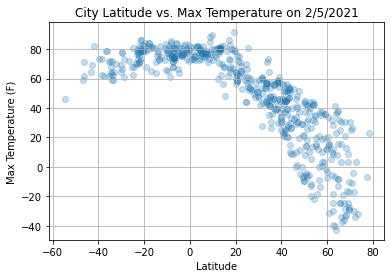

In [44]:

plt.scatter(weather_df["Lat"],weather_df["Max Temp"], alpha = 1/4)
plt.title("City Latitude vs. Max Temperature on 2/5/2021")
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (F)")
plt.grid (b=True,which="major",axis="both")
plt.savefig("Images/Lat_MaxTemp.png")
plt.show()

## Latitude vs. Humidity Plot

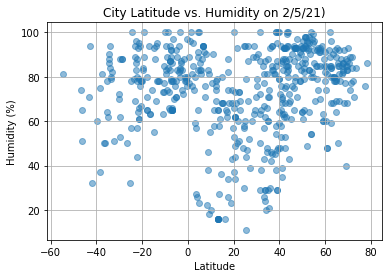

In [47]:
plt.scatter(weather_df["Lat"],weather_df["Humidity"],alpha = 1/2)
plt.title("City Latitude vs. Humidity on 2/5/21)")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")

plt.grid (b=True,which="major",axis="both")
plt.savefig("Images/Lat_Humidity.png")
plt.show()

## Latitude vs. Cloudiness Plot

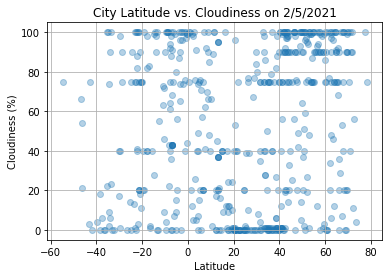

In [50]:
plt.scatter(weather_df["Lat"],weather_df["Cloudiness"], alpha = 1/3)
plt.title("City Latitude vs. Cloudiness on 2/5/2021")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.grid (b=True,which="major",axis="both")
plt.savefig("Images/Lat_Cloud.png")
plt.show()

## Latitude vs. Wind Speed Plot

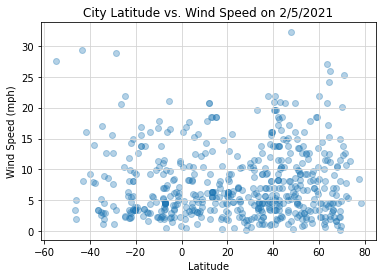

In [54]:
plt.scatter(weather_df["Lat"],weather_df["Wind Speed"],alpha= 1/3)
plt.title("City Latitude vs. Wind Speed on 2/5/2021")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (mph)")
plt.grid (b=True,which="major",axis="both",linestyle="-",color="lightgrey")
plt.savefig("Images/Lat_wspeed.png")
plt.show()

## Linear Regression

####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-value is: 0.46937863826630627


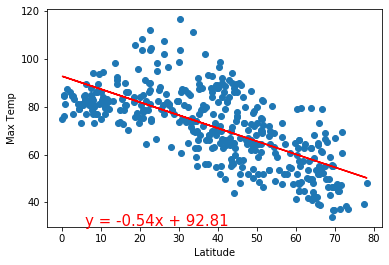

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-value is: 0.6082708688906918


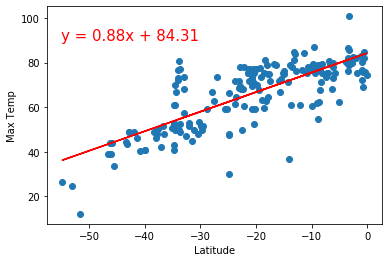

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-value is: 0.000543987878808455


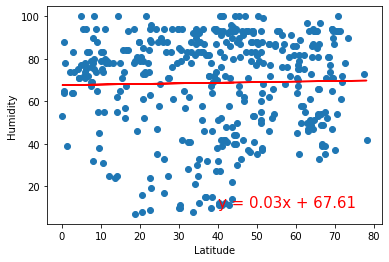

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-value is: 0.014985174297345524


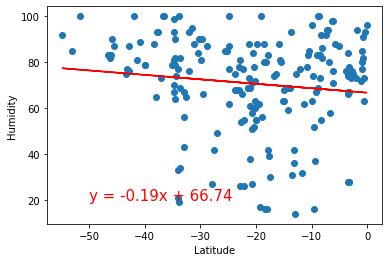

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-value is: 0.0020898727664228514


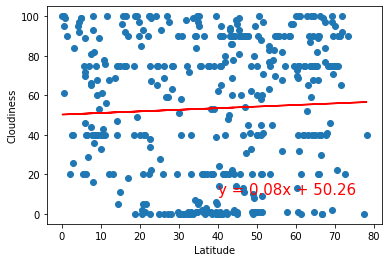

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-value is: 0.0035263772085582894


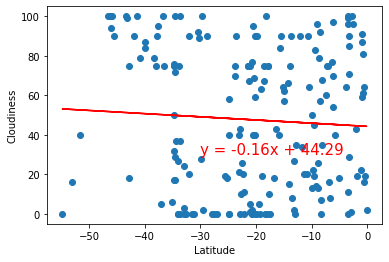

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-value is: 0.04019723576144484


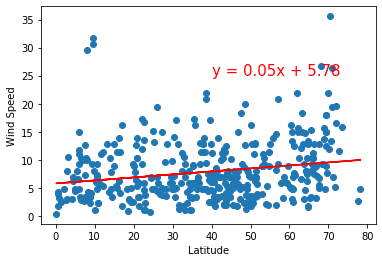

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-value is: 0.017128274759839232


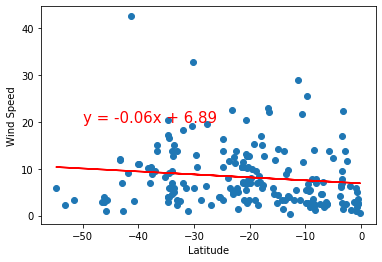